In [1]:
%load_ext autoreload
%autoreload 2

In [135]:
from wdtools import *

In [3]:
# this can take about 9 - 11 minutes
start = time.time()
all_taxlot = combine_taxlot()
end = time.time()
print(f'it took {round((end - start)/60, 0)} minutes to complete')

it took 9.0 minutes to complete


In [4]:
setID = 'Set006'; nm_to_add = 4370

In [5]:
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [6]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [7]:
ml = 'N'
#ml = 'Y'

In [143]:
notes = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'review_unmatched_{setID}_r2_{ml}_0.csv'))

In [145]:
notes.wetdet_delin_number.unique()

array(['WD2022-0656', 'WD2022-0599', 'WD2022-0448', 'WD2022-0489',
       'WD2022-0636', 'WD2022-0483', 'WD2022-0436', 'WD2022-0604',
       'WD2022-0695', 'WD2022-0474', 'WD2022-0435'], dtype=object)

In [9]:
notes.wetdet_delin_number.unique()

array(['WD2022-0435', 'WD2022-0656', 'WD2022-0599', 'WD2022-0448',
       'WD2022-0636', 'WD2022-0494', 'WD2022-0612', 'WD2022-0489',
       'WD2022-0483', 'WD2022-0604', 'WD2022-0695', 'WD2022-0436',
       'WD2022-0474'], dtype=object)

In [10]:
notes.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 'latitude',
       'longitude', 'DecisionLink', 'record_ID', 'IDyear', 'correct_type',
       'correction', 'cor_trsqq', 'ORTaxlot'],
      dtype='object')

In [144]:
notes.shape

(11, 13)

In [237]:
i=0

In [235]:
i = i+1

In [223]:
i

9

In [238]:
notes.loc[i, ['wetdet_delin_number', 'record_ID', 'trsqq', 'county', 'correct_type', 
              'correction', 'cor_trsqq', 'parcel_id', 'ORTaxlot']]

wetdet_delin_number                                          WD2022-0656
record_ID                                                           4951
trsqq                                                           08S08E00
county                                                             Wasco
correct_type           township number, range number, range direction...
correction             from 08, 08, E, 00 and 00 to 07, 02, W, 28 and C0
cor_trsqq                                                     07S02W28C0
parcel_id                                                           200p
ORTaxlot                                   2407.00S02.00W28C0--000001100
Name: 0, dtype: object

In [127]:
taxlot2trsqq(x='0212.0S06.0W12BB00--000012000')

'12S06W12BB'

In [216]:
create_ORTaxlot(cnt_code=cnt_dict['Curry'], trsqq='32S15W32', lot='100')

'0832.00S15.00W3200--000000100'

In [217]:
'0832.00S15.00W3200--000000100' in all_txid

False

In [266]:
'09S35VE' in trsqq

True

In [215]:
convert_trsqq('32S15W32')

'32.00S15.00W3200'

In [31]:
notes.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 'latitude',
       'longitude', 'DecisionLink', 'record_ID', 'IDyear', 'correct_type',
       'correction', 'cor_trsqq', 'ORTaxlot'],
      dtype='object')

In [46]:
print(notes.loc[1, 'DecisionLink'])

https://docs.dsl.state.or.us/PublicReview/ElectronicFile.aspx?docid=3918190&dbid=0


In [17]:
print(notes.loc[i, 'correction'])

some lots are not matched, need to review trsqq, the close-match is 08N10W25


In [227]:
wdID = notes.loc[i,'wetdet_delin_number']

In [399]:
wdID = 'WD2020-0012'

In [228]:
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)

<AxesSubplot:>

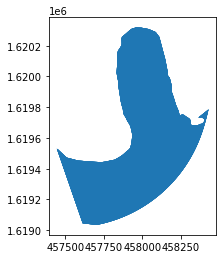

In [19]:
all_taxlot[all_taxlot.ORTaxlot==notes.loc[i,'ORTaxlot']].plot()

In [229]:
selcols = ['wetdet_delin_number', 'county', 'trsqq', 'parcel_id', 'latitude', 'longitude', 'record_ID', 'notes']
wd.loc[wd.wetdet_delin_number == wdID, selcols]

,wetdet_delin_number,county,trsqq,parcel_id,latitude,longitude,record_ID,notes
68,WD2022-0435,Clatsop,08N10W25D,"700p, Hwy 101 ROW",46.143568,-123.871222,4439,"ROW, Partial"


In [230]:
lon=wd.loc[wd.wetdet_delin_number == wdID, 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdID, 'latitude'].values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-123.871222,46.143568,POINT (457752.862 1619204.124)


In [225]:
wd_pt  = get_point_from_lonlat(lon = lon, lat = lat)

In [99]:
taxlot = all_taxlot

In [226]:
year = 2021

In [227]:
tID = extract_taxlot_info(wd_pt = wd_pt, taxlot = taxlot, year = year)

In [228]:
tID

'3004.00N29.00E06C0--000004601'

In [194]:
ctyp = notes.loc[i,'correct_type']#.split(' and ')[1]
ctyp

'QQ'

In [85]:
ctyp = 'QQ'

In [195]:
crt = notes.loc[i,'correction']
crt

'from 00 to A0'

In [196]:
ft = crt.split('from ')[1].split(' to ')
ft

['00', 'A0']

In [86]:
ft = ['1N1E33AC', '01N01E33AC']

In [73]:
ft[0] = '00'

In [38]:
ft[1] = 'DB'

In [39]:
ft

['Multnomah', 'Washington']

In [517]:
f = crt.split('from ')[1].split(' and ')[0]
t = crt.split(' to ')[1].split(' and ')[0]

In [523]:
f = crt.split(' and ')[1].split(' to ')[0]
t = crt.split(' and ')[2]

In [524]:
print(f, t)

Q VE


In [231]:
rID = notes.loc[i,'record_ID']
rID

4439

In [267]:
df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'))

In [271]:
'09S35.5E00'.replace(df.loc[3, 'from'], df.loc[3, 'to'])

'09S35VE00'

In [162]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': 'range direction', 'from': '.5', 'to': 'V'},
        ignore_index = True)

In [232]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': 'QQ', 'from': 'D0', 'to': '00'},
        ignore_index = True)

In [198]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [59]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [47]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'parcel_id', 'cor_type': 'parcel id', 'from': '102,103', 'to': '100'},
        ignore_index = True)

In [525]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': f, 'to': t},
        ignore_index = True)

In [597]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': 'county', 'from': 'Benton', 'to': 'Polk'},
        ignore_index = True)

In [233]:
df

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2022-0435,4439,trsqq,QQ,D,0
1,WD2022-0448,4666,parcel_id,parcel id,"102,103",100
2,WD2022-0636,4773,county,county,Marion,Linn
3,WD2022-0489,4509,trsqq,range direction,.5,V
4,WD2022-0483,4475,trsqq,QQ,DC,00
5,WD2022-0436,4845,trsqq,section number,28,00
6,WD2022-0604,4635,trsqq,QQ,00,A0
7,WD2022-0695,4674,trsqq,QQ,00,A0
8,WD2022-0474,4468,trsqq,QQ,00,C0
9,WD2022-0435,4439,trsqq,QQ,D0,00


In [169]:
df.head()

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2021-0038,4263,trsqq,section number,06,00


In [70]:
df.loc[2, 'field'] = 'parcel_id'

In [234]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'), index=False)

In [171]:
df.shape

(1, 6)

In [ ]:
09S35V5E00

In [239]:
r1df = pd.read_csv(os.path.join(inpath + f'\\output\\to_review\\unmatched_df_{setID}_r1_N.csv'))

In [215]:
r1df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'DocumentName', 'DecisionLink', 'is_batch_file', 'status_name',
       'received_date', 'Coord-Source', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [240]:
wdIDs = r1df.wetdet_delin_number.unique()

In [260]:
wdIDs

array(['WD2022-0398'], dtype=object)

In [261]:
i = 0

In [258]:
i = i + 1

In [89]:
i

5

In [243]:
# need to create the notes first
#df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'))

In [262]:
r1df.loc[r1df.wetdet_delin_number == wdIDs[i], ['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 
                                                'latitude', 'longitude', 'record_ID']]

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,record_ID
0,WD2022-0398,01S24ED01,"902,903,1001p,1002p,1009p,2300,2301,2302p",Morrow,45.500892,-119.834938,4871
1,WD2022-0398,01S24ED01,"2303p,4204p,2500,4600,ROW",Morrow,45.500892,-119.834938,4860


In [245]:
url = r1df.loc[r1df.wetdet_delin_number == wdIDs[i], 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)

In [246]:
j=0

In [247]:
sel = r1df.wetdet_delin_number == wdIDs[i]

In [254]:
j = j + 1

In [427]:
j

1

In [248]:
crt = review_wd_record_w_coord(wd_id=wdIDs[i], 
                         county_to_check=r1df.loc[sel, 'county'].values[j], 
                         trsqq_to_check=r1df.loc[sel, 'trsqq'].values[j], 
                         parcel_IDs_to_check=r1df.loc[sel, 'parcel_id'].values[j], 
                         lon=r1df.loc[sel, 'longitude'].values[j], 
                         lat=r1df.loc[sel, 'latitude'].values[j], 
                         taxlot=all_taxlot, 
                         year=r1df.loc[sel, 'IDyear'].values[j])
print(crt)

reviewing WD2022-0398
there is not any matched lot, need to review trsqq, the close-match is 01S24E
lots to check: ['1001', '1002', '1009', '2300', '2301', '2302', '902', '903'], and lots to compare: ['100', '101', '102', '200', '300', '400', '401', '402', '403', '406', '499', '500', '600', '700', '701', '702', '800', '1000', '1003', '1004', '1005', '1006', '1007', '1008', '1100', '1101', '1102', '1200', '1300', '1301', '1400', '1500', '1701', '1900', '2000', '2100', '2400', '2500', '2700', '2701', '2702', '2703', '2705', '2800', '3000', '3200', '3300', '3301', '3302', '3400', '3500', '3501', '3502', '3503', '3600', '3700', '3800', '3900', '3901', '4000', '4100', '4101', '4102', '4201', '4202', '4205', '4700', 'ROADS', 'D00100900', 'D00100901', 'D00100902', 'D00100903', 'D00100904', 'D00101001', 'D00101002', 'D00101009', 'D00102300', 'D00102301', 'D00102302', 'D00102303', 'D00104204', 'D00104300', 'D00104400', 'D00104500', 'D00104600', 'ROADS']
('to review', 'there is not any matched l

In [249]:
lon=wd.loc[wd.wetdet_delin_number == wdIDs[i], 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdIDs[i], 'latitude'].values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-119.827373,45.50019,POINT (1484811.706 1367715.651)


In [250]:
lat=45.500892
lon=-119.834938
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-119.834938,45.500892,POINT (1482869.862 1367955.825)


In [419]:
crt

('range direction and section number', 'from E and 13 to EA and 0')

In [415]:
corrected_trsqq = '05N29EB0'

In [416]:
corrected_trsqq in trsqq

True

In [27]:
txid = create_ORTaxlot(cnt_code=cnt_dict[r1df.loc[sel, 'county'].values[j]], 
                trsqq=corrected_trsqq, 
                lot=r1df.loc[sel, 'parcel_id'].values[j])

In [29]:
txid in all_taxlot.ORTaxlot.values

True

<AxesSubplot:>

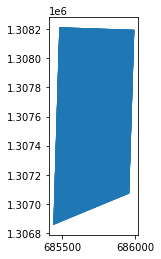

In [30]:
all_taxlot[all_taxlot.ORTaxlot==txid].plot()

In [251]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [80]:
ft = crt[1].split('from ')[1].split(' to ')
print(ft)

['00', 'B0']


In [73]:
wdIDs[i]

'WD2020-0195'

In [256]:
df = df.append({'wetdet_delin_number': wdIDs[i],
                'record_ID': r1df.loc[sel, 'record_ID'].values[j],
                'field': 'trsqq', 
                'cor_type': 'QQ', 
                'from': '10', 
                'to': '00'},
        ignore_index = True)

In [86]:
df = df.append({'wetdet_delin_number': wdIDs[i],
                'record_ID': r1df.loc[sel, 'record_ID'].values[j],
                'field': 'trsqq', 
                'cor_type': crt[0], 
                'from': ft[0], 
                'to': ft[1]},
        ignore_index = True)

In [257]:
df

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2022-0398,4871,trsqq,section number,D0,00
1,WD2022-0398,4871,trsqq,QQ,10,00
2,WD2022-0398,4860,trsqq,section number,D0,00
3,WD2022-0398,4860,trsqq,QQ,10,00


In [263]:
ml = 'N'

In [264]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'), index=False)